# 🍕 Food Recognition Benchmark

Credits: This notebook is fork of notebook created by @shubhamai for previous iteration of the challenge. You can find the [original notebook here](https://www.aicrowd.com/showcase/food-recognition-challenge-data-exploration-baseline).

<br>

# Problem Statement
Detecting & Segmenting various kinds of food from an image. For ex. Someone got into new restaurent and get a food that he has never seen, well our DL model is in rescue, so our DL model will help indentifying which food it is from the class our model is being trained on!    

<img src="https://i.imgur.com/zS2Nbf0.png" width="300" />


# Dataset
We will be using data from Food Recognition Challenge - A benchmark for image-based food recognition challange which is running since 2020.


https://www.aicrowd.com/challenges/food-recognition-benchmark-2022#datasets

We have a total of **39k training images** with **3k validation set** and **4k public-testing set**. All the images are RGB and annotations exist in **MS-COCO format**. 

<img src="https://lh5.googleusercontent.com/iySoTCAHFoEKxjvzELzCJKbZaTG2TzMcjuBxAlBVGupjkpE_XI1xNPnE71UIBthTu9_fZ4A1tz-ArABpI0DD2ZeF87qHPccRogEezd-UbhkQgZcQBYCE1HMeDusaKtj8ClCWjw-p">

# Evaluation

The evaluation metrics is IOU aka. Intersection Over Union ( more about that later ). 

The actualy metric is computed by averaging over all the precision and recall values for IOU which greater than 0.5.

https://www.aicrowd.com/challenges/food-recognition-challenge#evaluation-criteria


# What does this notebook contains?

1. Setting our Workspace 💼

2. Data Exploration 🧐
  - Reading Dataset
  - Data Visualisations 

3. Image Visulisation 🖼️
   - Reading Images

4. Creating our Dataset 🔨
  - Fixing the Dataset
  - Creating our dataset

5. Creating our Model 🏭
   - Creating R-CNN Model
   - Setting up hyperparameters
   
6. Training the Model 🚂
  - Setting up Tensorboard
  - Start Training!

7. Evaluating the model 🧪
  - Evaluating our Model

7. Testing the Model 💯
  - Testing the Model

8. Submitting our predictions 📝

9. Generate More Data + Some tips & tricks 💡



# Setting our Workspace 💼

In this section we will be downloading our dataset, unzipping it & downliading detectron2 library and importing all libraries that we will be using

## Downloading & Unzipping our Dataset

In [ ]:
# Login to AIcrowd
!pip install aicrowd-cli > /dev/null
!aicrowd login

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.9.0+cu111 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Please login here: https://api.aicrowd.com/auth/eKqGj7l1PZYTAns3rtxmLWqH_sGN4QVm5K-p4pJi1wk
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://api.aicrowd.com/auth/eKqGj7l1PZY

In [ ]:
# List dataset for this challenge
!aicrowd dataset list -c food-recognition-benchmark-2022

# Download dataset
!aicrowd dataset download -c food-recognition-benchmark-2022 0 1 2 3

                          Datasets for challenge #962                           
┌───┬────────────────────────────────┬───────────────────────────────┬─────────┐
│ # │ Title                          │ Description                   │    Size │
├───┼────────────────────────────────┼───────────────────────────────┼─────────┤
│ 0 │ random_prediction.json         │ Random prediction for Quick   │ 4.36 MB │
│   │                                │ Submission into Round 2       │         │
│ 1 │ [Round 2]                      │ [Public] Testing Dataset      │    185M │
│   │ public_test_release_2.1.tar.gz │ (contains 2819 images,        │         │
│   │                                │ without annotations)          │         │
│ 2 │ [Round 2]                      │ Training Dataset (contains    │    3.1G │
│   │ public_training_set_release_2… │ 54392 images and 323          │         │
│   │                                │ categories)                   │         │
│ 3 │ [Round 2]             

In [ ]:
# # Create data directory
# !mkdir -p data/ data/train data/val data/test
# !cp *test* data/test && cd data/test && echo "Extracting test dataset" && tar -xvf *test* > /dev/null
# !cp *val* data/val && cd data/val && echo "Extracting val dataset" &&  tar -xvf *val* > /dev/null
# !cp *train* data/train && cd data/train && echo "Extracting train dataset" &&  tar -xvf *train* > /dev/null

Extracting test dataset
Extracting val dataset
Extracting train dataset


In [ ]:
# Create data directory
# !mkdir -p ./drive/MyDrive/AICrowd/data/train
# !cp *test_release_2.1* ./drive/MyDrive/AICrowd/data/test && cd ./drive/MyDrive/AICrowd/data/test && echo "Extracting test dataset" && tar -xvf *test* > /dev/null
# !cp *validation_set_release_2.1* ./drive/MyDrive/AICrowd/data/val && cd ./drive/MyDrive/AICrowd/data/val && echo "Extracting val dataset" &&  tar -xvf *val* > /dev/null
# !cp *training_set_release_2.1* ./drive/MyDrive/AICrowd/data/train && cd ./drive/MyDrive/AICrowd/data/train && echo "Extracting train dataset" &&  tar -xvf *train* > /dev/null

cp: cannot stat '*test_release_2.1*': No such file or directory
cp: cannot stat '*validation_set_release_2.1*': No such file or directory
cp: cannot stat '*training_set_release_2.1*': No such file or directory


So, the `data` directory is something like this:

<img src="https://images.aicrowd.com/uploads/ckeditor/pictures/674/content_carbon__3_.png" width="50%">

## Importing Necessary Libraries

In [ ]:
!pip install -U torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U pycocotools
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.9 MB/s eta 0:10:53tcmalloc: large alloc 1147494400 bytes == 0x55719330c000 @  0x7ffb2ecc7615 0x557159e8917c 0x557159f6947a 0x557159e8bf9d 0x557159f7dd4d 0x557159effec8 0x557159efaa2e 0x557159e8d88a 0x557159effd30 0x557159efaa2e 0x557159e8d88a 0x557159efc719 0x557159f7eb76 0x557159efbd95 0x557159f7eb76 0x557159efbd95 0x557159f7eb76 0x557159efbd95 0x557159e8dce9 0x557159ed1579 0x557159e8c902 0x557159effc4d 0x557159efaa2e 0x557159e8d88a 0x557159efc719 0x557159efaa2e 0x557159e8d88a 0x557159efb8f6 0x557159e8d7aa 0x557159efbb4f 0x557159efaa2e
     |████████████████▌               | 1055.7 MB 1.9 MB/s eta 0:08:30tcmalloc: large alloc 1434370048 bytes == 0x5571d7962000 @  0x7ffb2ecc7615 0x557159e8917c 0x557159f6947a 0x557159e8bf9d 0x557159f7dd4d 0x557159effec8 0x557159efaa2e 0x557159e8d88a 0x557159effd30 0x557159efaa2e 0x557159e8d88a 0x557159efc719 0x557159f7eb76 0x557159efbd

In [ ]:
# install detectron2:
!pip install -U detectron2==0.6+cu111 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/index.html
     |████████████████████████████████| 6.9 MB 10.0 MB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 50 kB 4.2 MB/s 
     |████████████████████████████████| 147 kB 21.5 MB/s 
     |████████████████████████████████| 130 kB 34.8 MB/s 
     |████████████████████████████████| 749 kB 37.5 MB/s 
     |████████████████████████████████| 843 kB 18.4 MB/s 
     |████████████████████████████████| 112 kB 42.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220414-py3-none-any.whl size=61211 sha256=1e73931088e89af609e4d85b73a78a01613e0404d4b16215fbb634f53f945be9
  Stored in directory: /root/.cache/pip/wheels/df/f4/b8/7b5df8b6722f4c72315ce70c31aa693e00cef6a5056149bd28
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=95282bf0651935bf9ee9964417d5604c41af74839d83ebc41b872047b77b506d
  Sto

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import pandas as pd
import cv2
import json
from tqdm.notebook import tqdm

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# For reading annotations file
from pycocotools.coco import COCO

# utilities
from pprint import pprint # For beautiful print!
from collections import OrderedDict
import os 

# For data visualisation
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Data Exploration 🧐

In this section we are going to read our dataset & doing some data visualisations 

## Reading Data

In [ ]:
# Reading annotations.json
BASE_PATH = "./drive/MyDrive/AICrowd/"
TRAIN_ANNOTATIONS_PATH = BASE_PATH + "data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = BASE_PATH + "data/train/images/"

VAL_ANNOTATIONS_PATH = BASE_PATH + "data/val/annotations.json"
VAL_IMAGE_DIRECTIORY = BASE_PATH + "data/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=11.65s)
creating index...
index created!


In [ ]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)

## Data Format 🔍 


In [ ]:
# Reading all classes
category_ids = train_coco.loadCats(train_coco.getCatIds())
category_names = [_["name_readable"] for _ in category_ids]

print("## Categories\n-", "\n- ".join(category_names))

## Categories
- Beetroot, steamed, without addition of salt
- bread_wholemeal
- jam
- water
- bread
- banana
- soft_cheese
- ham_raw
- hard_cheese
- cottage_cheese
- coffee
- fruit_mixed
- pancake
- tea
- salmon_smoked
- avocado
- spring_onion_scallion
- ristretto_with_caffeine
- ham_n_s
- egg
- bacon
- chips_french_fries
- juice_apple
- chicken
- tomato
- broccoli
- shrimp_prawn
- carrot
- chickpeas
- french_salad_dressing
- pasta_hornli_ch
- sauce_cream
- pasta_n_s
- tomato_sauce
- cheese_n_s
- pear
- cashew_nut
- almonds
- lentil_n_s
- mixed_vegetables
- peanut_butter
- apple
- blueberries
- cucumber
- yogurt
- butter
- mayonnaise
- soup
- wine_red
- wine_white
- green_bean_steamed_without_addition_of_salt
- sausage
- pizza_margherita_baked
- salami_ch
- mushroom
- tart_n_s
- rice
- white_coffee
- sunflower_seeds
- bell_pepper_red_raw
- zucchini
- asparagus
- tartar_sauce
- lye_pretzel_soft
- cucumber_pickled_ch
- curry_vegetarian
- soup_of_lentils_dahl_dhal
- salmon
- salt_cake_ch_

In [ ]:
# Getting all categoriy with respective to their total images
no_images_per_category = {}

for n, i in enumerate(train_coco.getCatIds()):
  imgIds = train_coco.getImgIds(catIds=i)
  label = category_names[n]
  no_images_per_category[label] = len(imgIds)

img_info = pd.DataFrame(train_coco.loadImgs(train_coco.getImgIds()))
no_images_per_category = OrderedDict(sorted(no_images_per_category.items(), key=lambda x: -1*x[1]))

# Top 30 categories, based on number of images
i = 0
for k, v in no_images_per_category.items():
  print(k, v)
  i += 1
  if i > 30:
    break

water 4372
salad_leaf_salad_green 2807
tomato 2686
bread_white 2526
carrot 2193
butter 2180
bread_wholemeal 2030
coffee 2005
tea 1847
rice 1546
egg 1424
bread 1287
apple 1270
mixed_vegetables 1255
cucumber 1102
jam 1063
wine_red 936
cheese_n_s 918
banana 875
potato 854
bell_pepper_red_raw 806
bread_whole_wheat 782
hard_cheese 729
white_coffee 699
espresso 699
mixed_salad_chopped_without_sauce 659
avocado 647
tomato_sauce 623
zucchini 605
beef_n_s 572
strawberries 568


# Normalized Cut

In [ ]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imageio
from skimage.measure import regionprops

In [ ]:
!ls ./drive/MyDrive/AICrowd/data/train/images

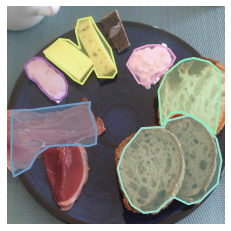

In [ ]:
img_no = 3

annIds = train_coco.getAnnIds(imgIds=train_annotations_data['images'][img_no]['id'])
anns = train_coco.loadAnns(annIds)

# load and render the image
# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,10))
plt.imshow(plt.imread(TRAIN_IMAGE_DIRECTIORY+train_annotations_data['images'][img_no]['file_name']))
plt.axis('off')
# Render annotations on top of the image
train_coco.showAnns(anns)
# fig.add_subplot(122)

[0 1 2 3 4 5 8]


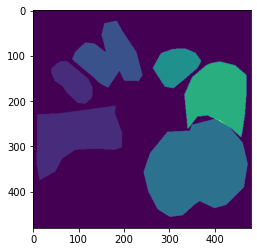

In [ ]:
mask = train_coco.annToMask(anns[0])
for i in range(len(anns)):
  mask += train_coco.annToMask(anns[i]) * i
plt.imshow(mask)
print(np.unique(mask))

In [ ]:
from math import sqrt
def label_with_closest_color(target, candidates):
    r, g, b = target
    color_diffs = []
    for label, color in candidates.items():
        cr, cg, cb = color
        color_diff = sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, label))
    return min(color_diffs)[1]

In [ ]:
from skimage import draw, color, exposure
def display_edges(image, g, threshold):
    image = image.copy()
    for edge in g.edges():
        n1, n2 = edge
 
        r1, c1 = map(int, g.nodes[n1]['centroid'])
        r2, c2 = map(int, g.nodes[n2]['centroid'])
        line  = draw.line(r1, c1, r2, c2)
        circle = draw.circle_perimeter(r1,c1,2)
        
        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,255,0
        image[circle] = 255,255,0
        
        image = image.astype(np.uint8)
        # cv2.imshow("edges_drawn_all", image)
 
    return image

In [ ]:
def norm_cut_segmentation(img_no, compactness=30, n_segments=400, thresh=.001, n_cuts=10, res_thresh = 0.015, show_img=True, save_img=False, mode="train"):
  img_name = train_annotations_data['images'][img_no]['file_name'] if mode == "train" else val_annotations_data['images'][img_no]['file_name']
  img_path = (TRAIN_IMAGE_DIRECTIORY + img_name) if mode == "train" else (VAL_IMAGE_DIRECTIORY + img_name)
  img_id = img_name.split('.')[0]
  img = cv2.imread(img_path)
  outs = []
  labels1 = segmentation.slic(img, compactness=compactness, n_segments=n_segments)
  out1 = color.label2rgb(labels1, img, kind='avg')
  g = graph.rag_mean_color(img, labels1, mode='similarity')

  labels2 = graph.cut_normalized(labels1, g, thresh=thresh, random_state=42, num_cuts=n_cuts)
      
  for label in np.unique(labels2):
    if np.count_nonzero(labels2 == label) < res_thresh * len(labels2) * len(labels2[0]): 
      labels2[labels2 == label] = 0
  out2 = color.label2rgb(labels2, img, kind='avg')
  if show_img:
    plt.imshow(labels2)
    cv2_imshow(np.concatenate((img, out1, out2), axis=1))
  if save_img:
    cv2.imwrite(f"drive/MyDrive/AICrowd/results/{mode}_{img_id}.png", np.concatenate((img, out1, out2), axis=1))
  print(len(np.unique(labels2)))
  
  return labels1, labels2

In [ ]:
norm_cut_segmentation(3, compactness=30, n_segments=500, thresh=0.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


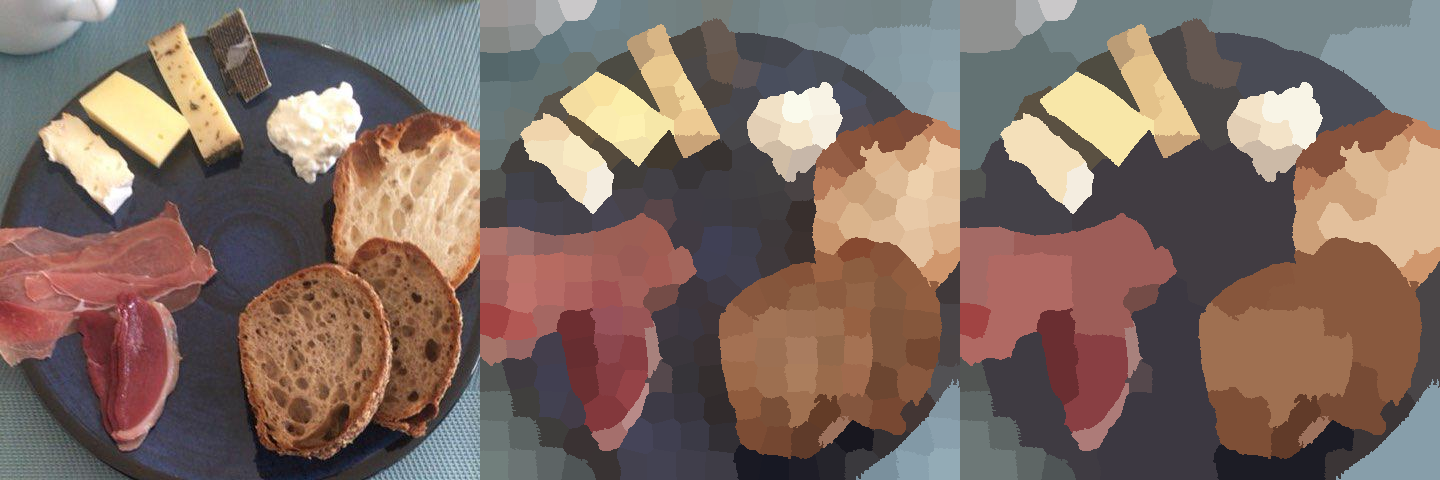

62


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


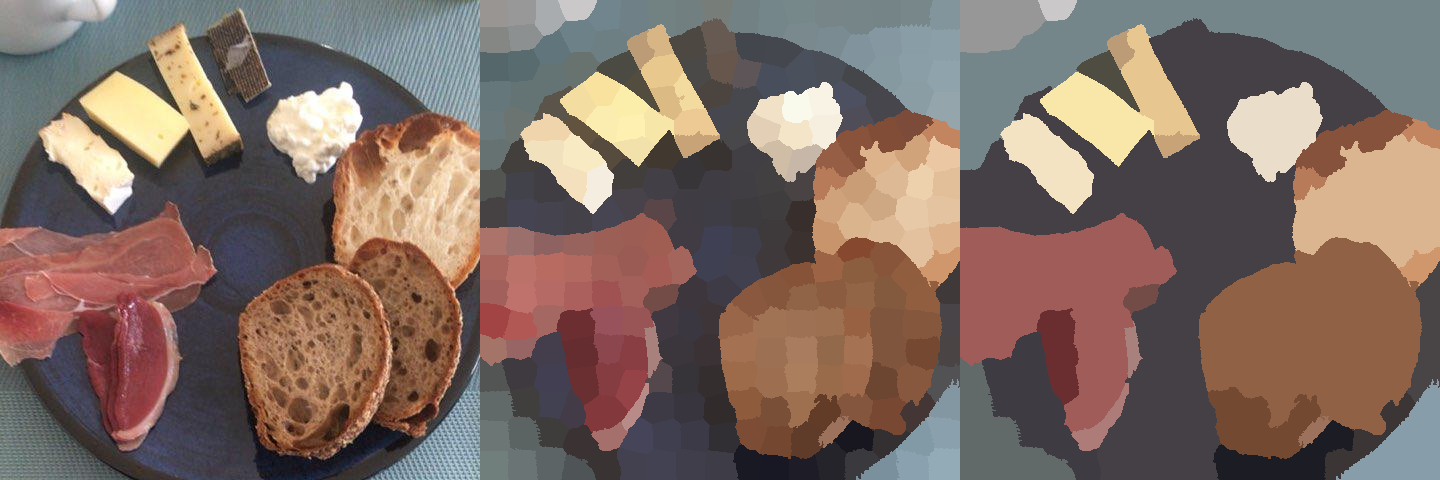

30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


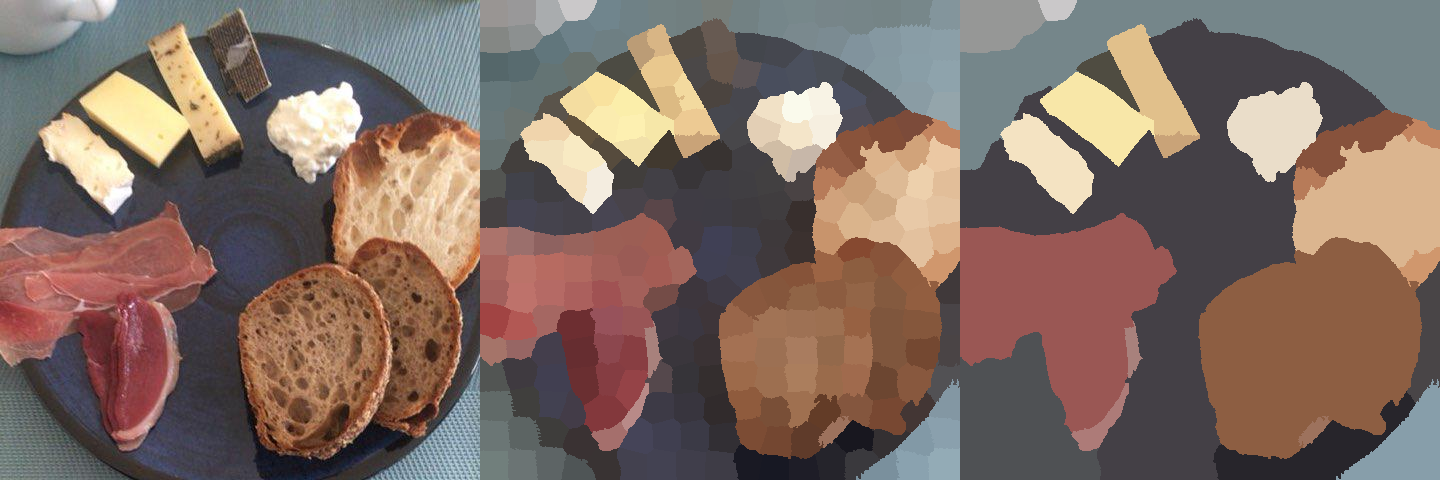

24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


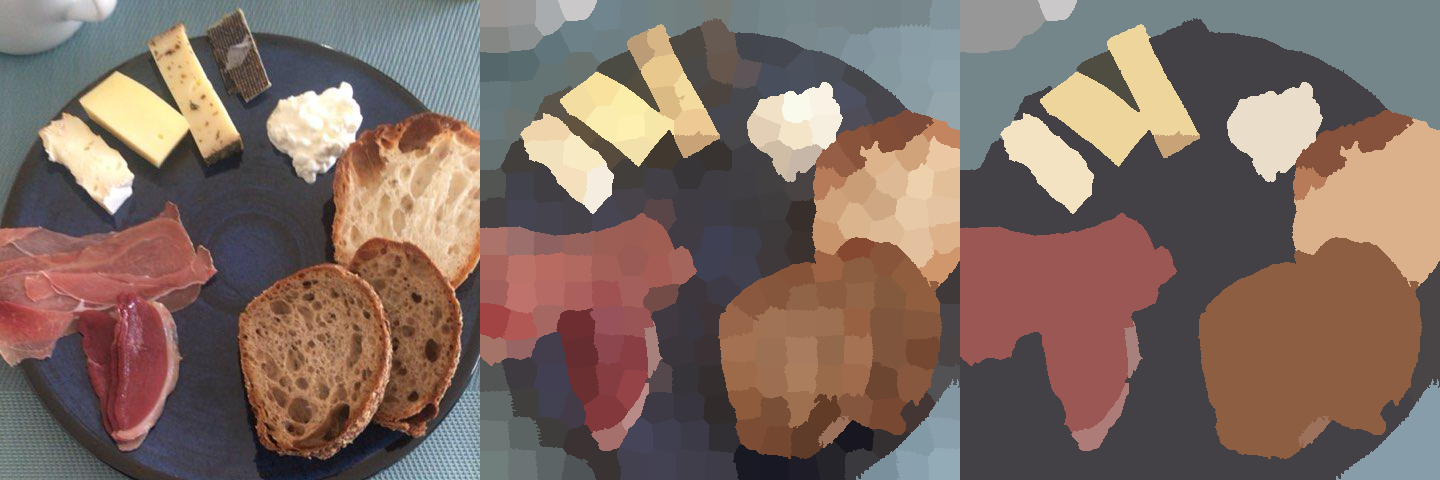

19


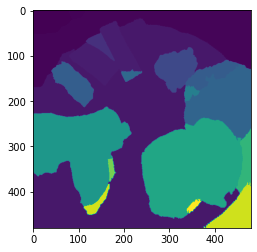

In [ ]:
img_no = 3
compactness=30
n_segments=500
thresh=0.001
res = []
for thresh in [0.1, 0.01, 0.001, 0.0001]:
  labels1, labels2 = norm_cut_segmentation(img_no, compactness=compactness, n_segments=n_segments, thresh=thresh, res_thresh=0)
  res.append((compactness, n_segments, thresh, labels1, labels2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


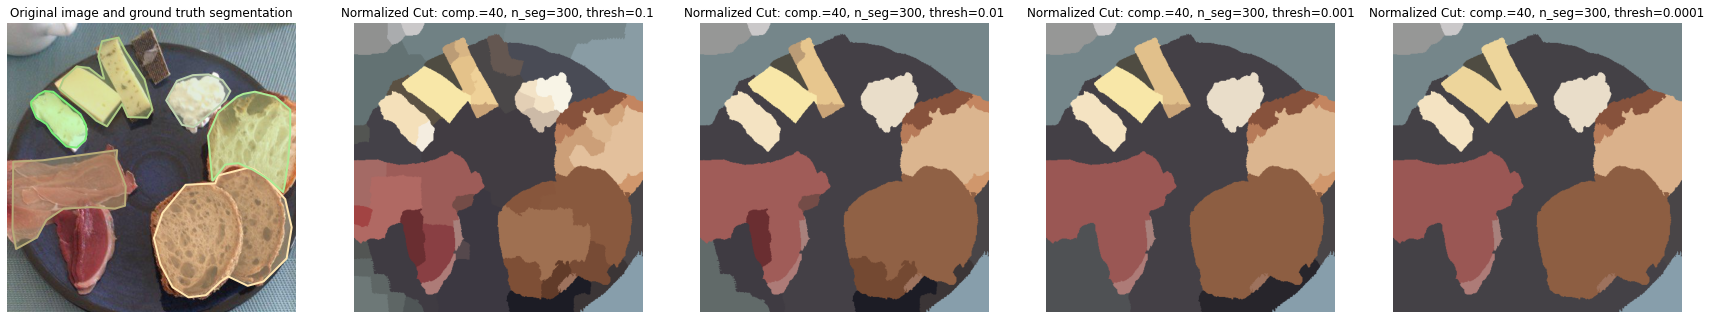

In [ ]:
img_path = TRAIN_IMAGE_DIRECTIORY+train_annotations_data['images'][img_no]['file_name']
img = plt.imread(img_path)
annIds = train_coco.getAnnIds(imgIds=train_annotations_data['images'][img_no]['id'])
anns = train_coco.loadAnns(annIds)
n_results = len(res)
fig, ax = plt.subplots(1, 5, figsize=(30, 15))
ax0 = plt.subplot(1, 5, 1)
ax0.imshow(img)
ax0.set_title("Original image and ground truth segmentation")
train_coco.showAnns(anns)
plt.axis('off')
# ax = plt.subplot(331)
# plt.axis('off')
# ax = plt.subplot(337)
# plt.axis('off')
for i, (comp, n_seg, thresh, labels1, labels2) in enumerate(res):
  # ax1 = plt.subplot(3, 3, 1+i*3+1)
  # out1 = color.label2rgb(labels1, img, kind='avg')
  # ax1.imshow(out1.astype('int'))
  # ax1.set_title(f"Oversegmentation: comp.={comp}, n_seg={n_seg}, thresh={thresh}")
  # plt.axis('off')
  ax2 = plt.subplot(1, 5, i+2)
  out2 = color.label2rgb(labels2, img, kind='avg')
  ax2.imshow(out2.astype('int'))
  ax2.set_title(f"Normalized Cut: comp.={comp}, n_seg={n_seg}, thresh={thresh}")
  plt.axis('off')
# Render annotations on top of the image


## Validate

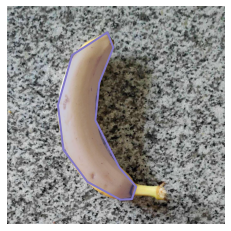

In [ ]:
img_no = 4

annIds = eval_coco.getAnnIds(imgIds=val_annotations_data['images'][img_no]['id'])
anns = eval_coco.loadAnns(annIds)

# load and render the image
plt.imshow(plt.imread(VAL_IMAGE_DIRECTIORY+val_annotations_data['images'][img_no]['file_name']))
plt.axis('off')
# Render annotations on top of the image
eval_coco.showAnns(anns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


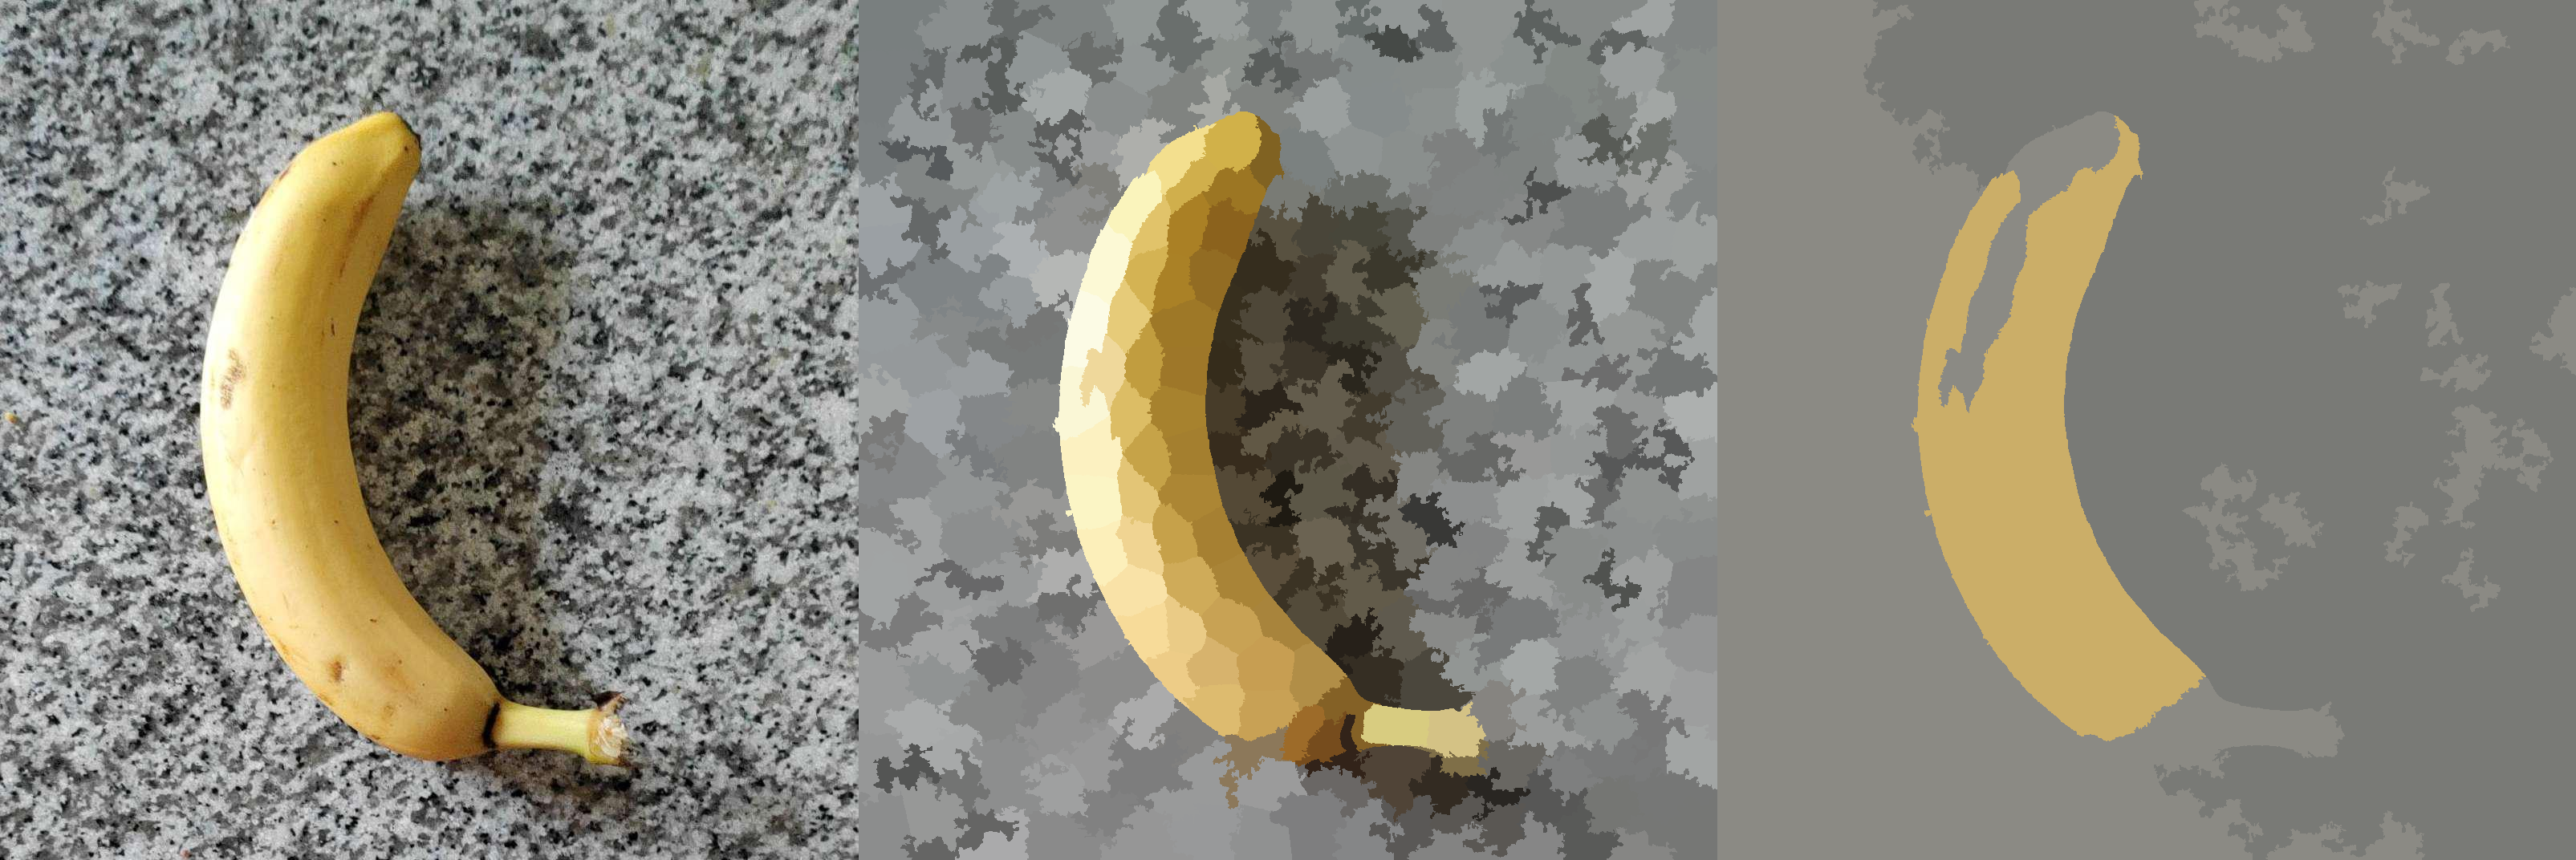

3


array([[0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3]])

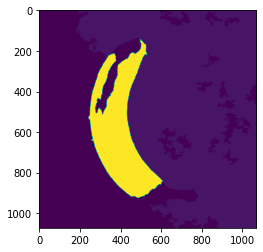

In [ ]:
norm_cut_segmentation(img_no, compactness=20, n_segments=400, thresh=0.0001, show_img=True, mode="eval")

### Prepare validation data

In [ ]:
eval_coco = COCO(VAL_ANNOTATIONS_PATH)

for n, i in enumerate(eval_coco.getCatIds()):
  imgIds = eval_coco.getImgIds(catIds=i)
  label = category_names[n]

eval_img_info = pd.DataFrame(eval_coco.loadImgs(eval_coco.getImgIds()))

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [ ]:
eval_img_info

id   file_name  width  height
0    149022  149022.jpg    455     455
1     85697  085697.jpg    852     852
2    147964  147964.jpg    905     904
3    134535  134535.jpg    792     792
4    123727  123727.jpg   1070    1072
..      ...         ...    ...     ...
941  117728  117728.jpg    401     400
942  113813  113813.jpg    766     766
943  155034  155034.jpg    624     624
944  166752  166752.jpg    840     840
945  136988  136988.jpg    973     972

[946 rows x 4 columns]

### Infer on validation set

In [ ]:
# img_no_eval = [i for i in range(100)]
img_no_eval = [i for i in range(len(eval_img_info))]
img_no_eval.remove(3)
img_id_eval = [eval_img_info.iloc[img_no].id for img_no in img_no_eval]

In [ ]:
from tqdm import tqdm
anns = []
for img_no in tqdm(img_no_eval):
  img_id = eval_img_info.iloc[img_no].id
  img_path = VAL_IMAGE_DIRECTIORY+val_annotations_data['images'][img_no]['file_name']
  labels = knn.calculate_per_image(img_path, k=10, pca=True)
  # labels = norm_cut_segmentation(img_no, compactness=20, n_segments=400, thresh=0.001, show_img=False, save_img=True, mode="eval")
  curr_anns = segmentationToCocoResult(labels, img_id, stuffStartId=1)
  for ann in curr_anns:
    ann["segmentation"]["counts"] = ann["segmentation"]["counts"].decode("ascii")
  anns += curr_anns

In [ ]:
with open("drive/MyDrive/AICrowd/anns_val_0.015.json", "w") as file:
  json.dump(anns, file)

### Compute AP/AR

In [ ]:
from coco_eval import COCOeval

In [ ]:
# cocoDt = train_coco.loadRes('drive/MyDrive/AICrowd/anns_100.json')
cocoDt = eval_coco.loadRes(anns)
E = COCOeval(eval_coco, cocoDt, 'segm')
E.params.useCats = False
E.params.imgIds = img_id_eval
E.evaluate()
E.accumulate()
E.summarize()

## Showcase

In [ ]:
labels = norm_cut_segmentation(8, compactness=20, n_segments=400, thresh=0.0001, show_img=True, mode="eval")

In [ ]:
anns = segmentationToCocoResult(labels, img_id)
for ann in anns:
  ann['score'] = 1
cocoDt = train_coco.loadRes(anns)
E = COCOeval(train_coco, cocoDt, 'segm')
E.params.useCats = False
E.params.imgIds = [img_id]

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


In [ ]:
E.evaluate()
E.accumulate()
E.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
catid [50, 100022, 100031, 100049, 100057, 100059, 100060, 100063, 100064, 100067, 100068, 100069, 100070, 100072, 100073, 100076, 100077, 100078, 100080, 100082, 100083, 100084, 100086, 100089, 100092, 100093, 100099, 100101, 100102, 100104, 100105, 100107, 100108, 100111, 100113, 100114, 100115, 100123, 100129, 100130, 100131, 100132, 100133, 100135, 100140, 100141, 100142, 100143, 100145, 100146, 100150, 100151, 100152, 100156, 100157, 100158, 100160, 100161, 100164, 100171, 100172, 100173, 100174, 100175, 100176, 100177, 100178, 100179, 100180, 100181, 100182, 100183, 100184, 100185, 100186, 100190, 100192, 100195, 100196, 100200, 100206, 100224, 100229, 100234, 100235, 100243, 100245, 100249, 100250, 100264, 100282, 100300, 100301, 100302, 100310, 100314, 100315, 100318, 100319, 100321, 100322, 100324, 100325, 100332, 100333, 100334, 100335, 100337, 100338, 100346, 100348, 100349, 100352, 100355, 100360, 100364, 10042

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  from ipykernel import kernelapp as app


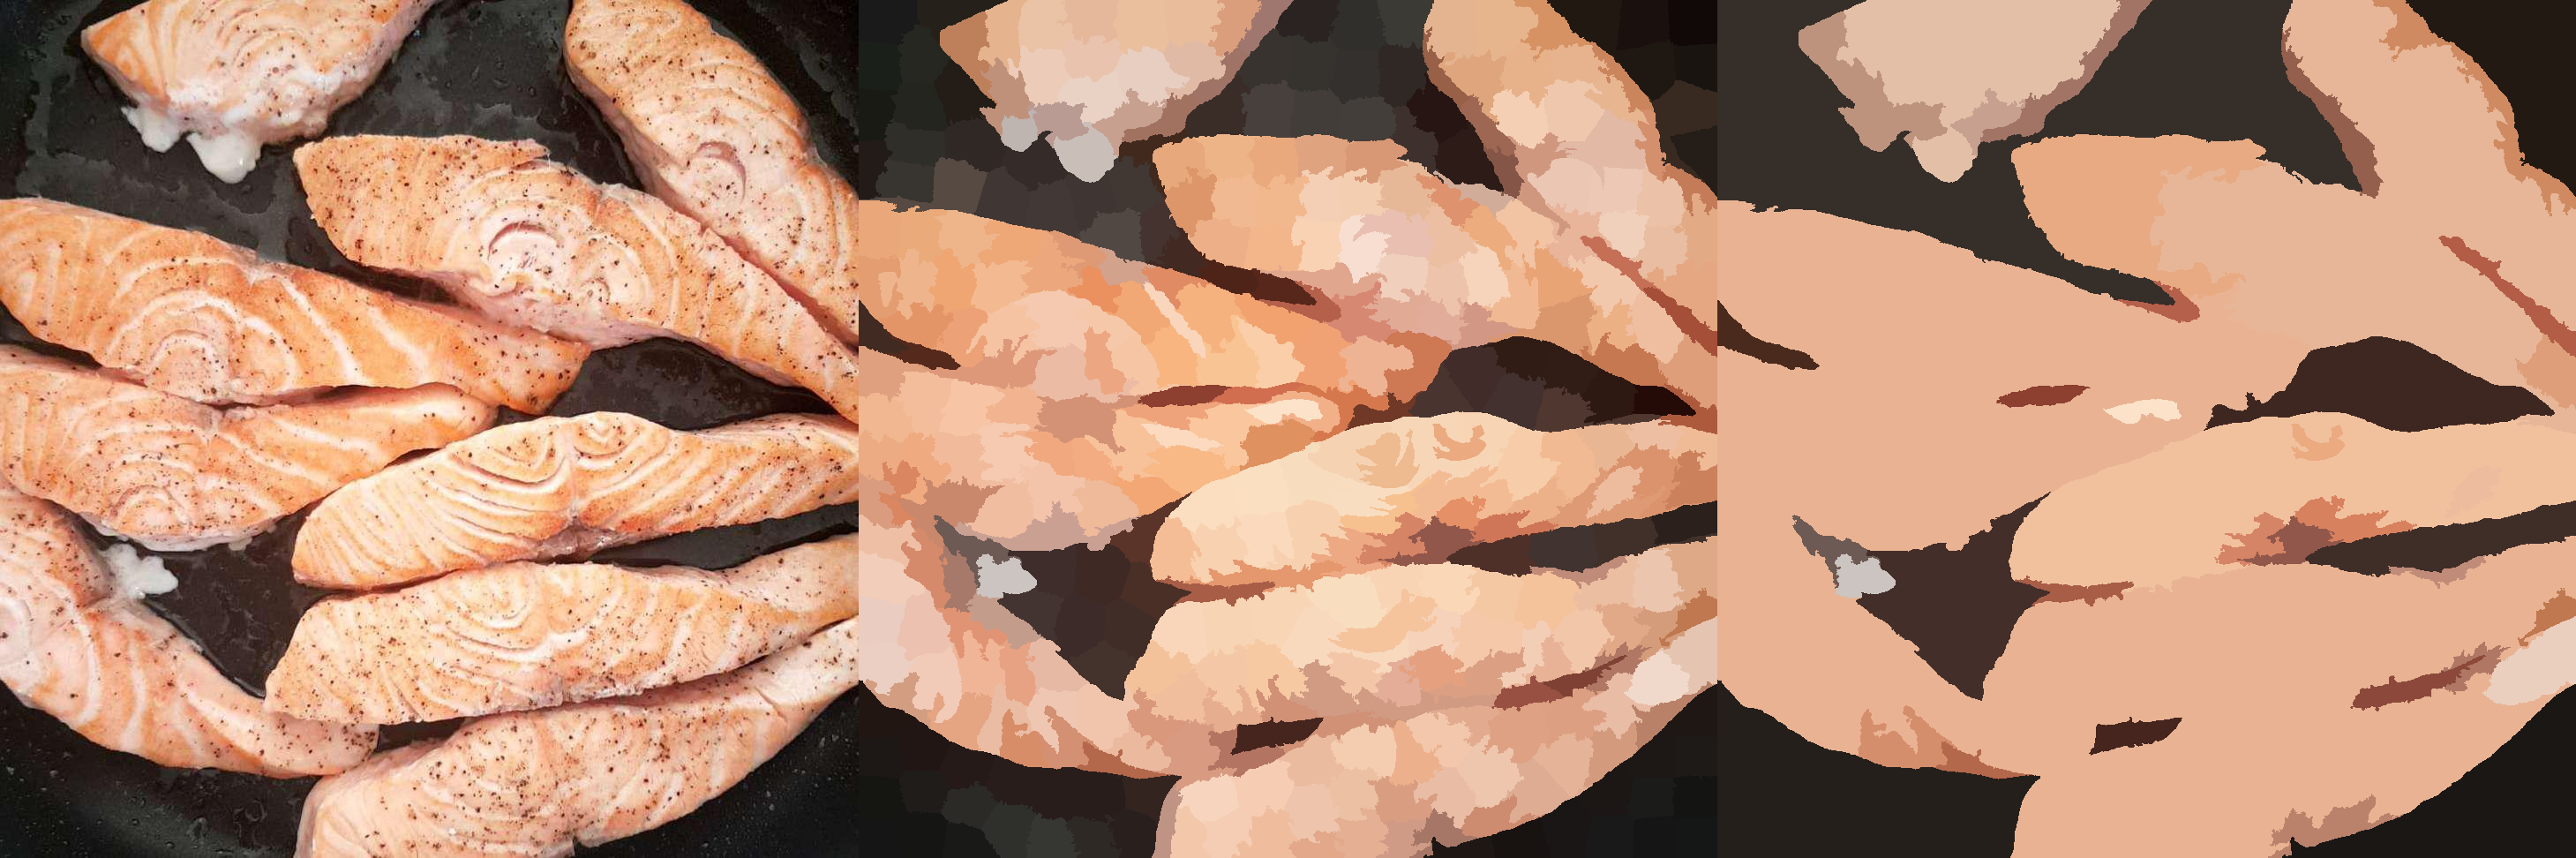

40


array([[  0,   0,   0, ...,  15,  15,  15],
       [  0,   0,   0, ...,  15,  15,  15],
       [  0,   0,   0, ...,  15,  15,  15],
       ...,
       [302, 302, 302, ..., 306, 306, 306],
       [302, 302, 302, ..., 306, 306, 306],
       [302, 302, 302, ..., 306, 306, 306]])

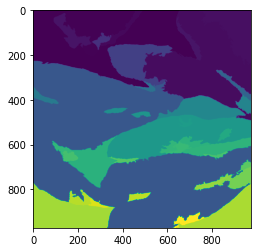

In [ ]:
norm_cut_segmentation(50, compactness=20, n_segments=400, thresh=.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


51


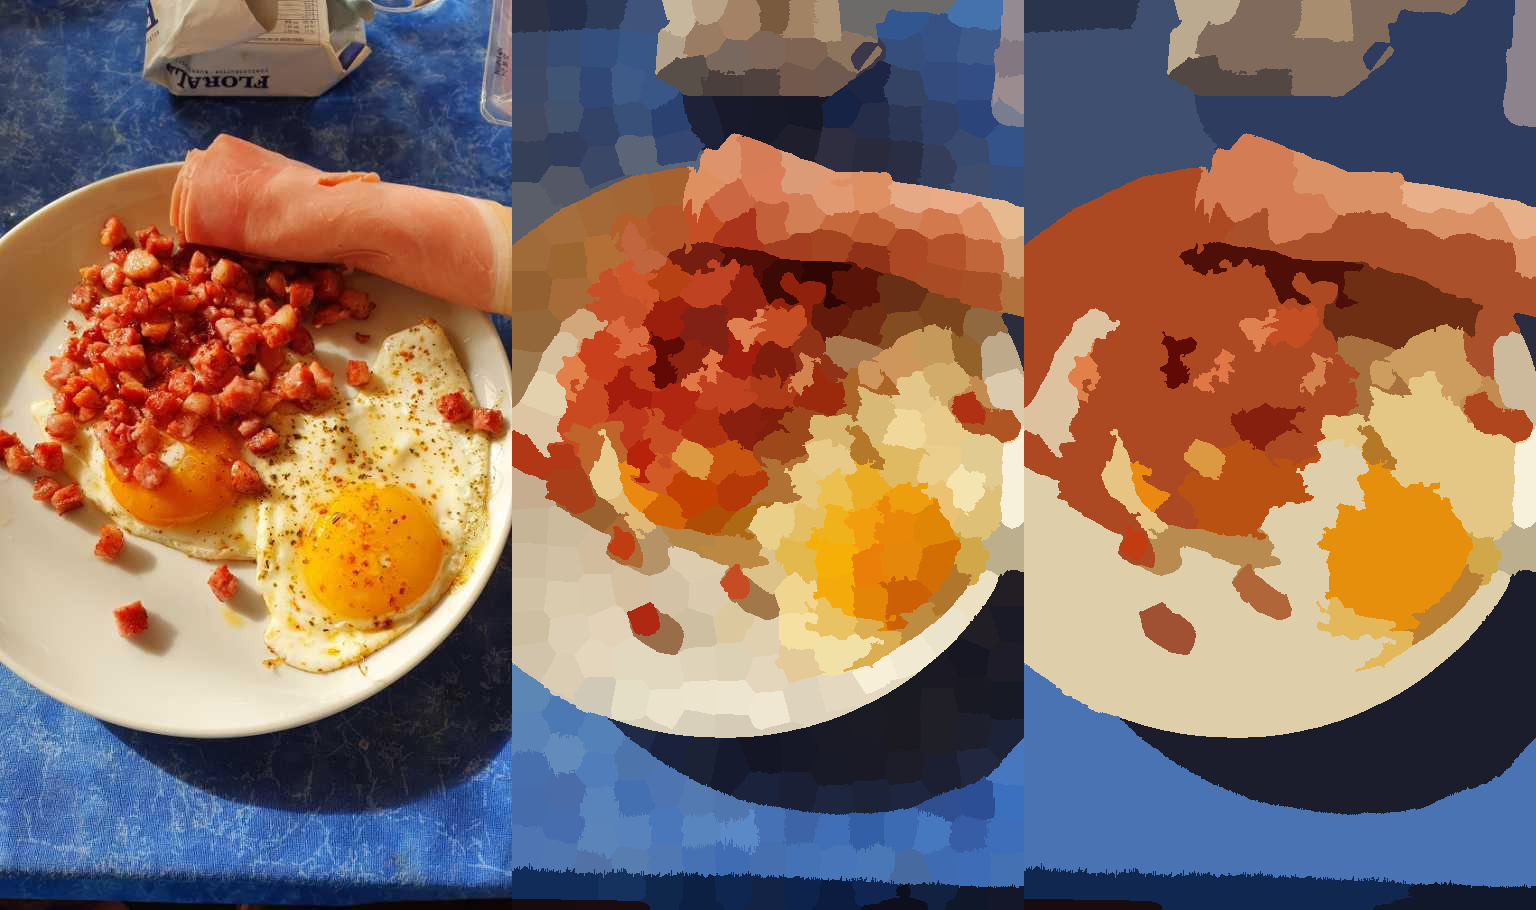

In [ ]:
norm_cut_segmentation(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  after removing the cwd from sys.path.


26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


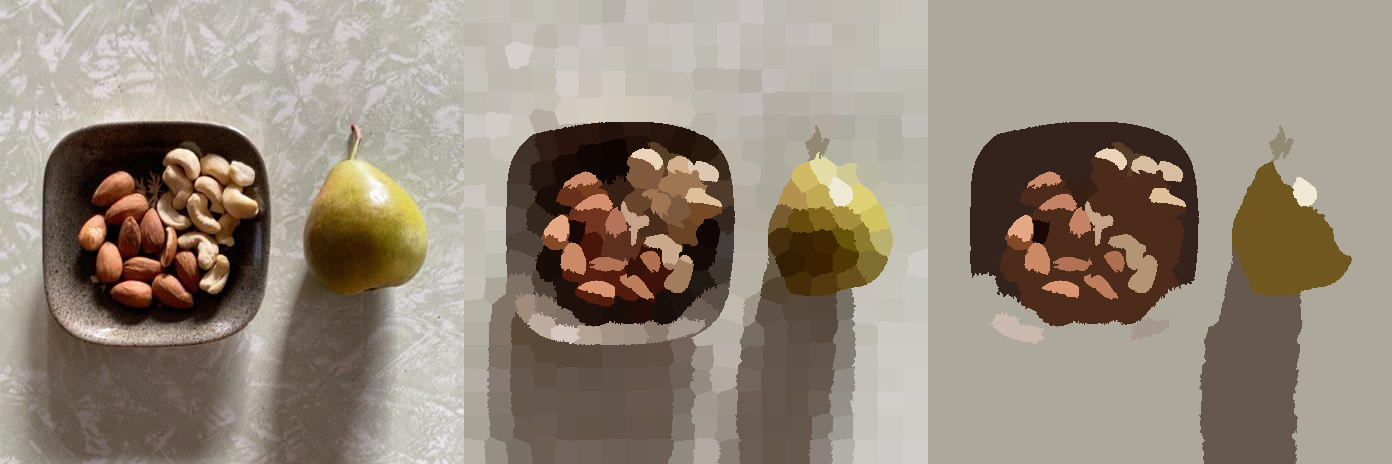

In [ ]:
norm_cut_segmentation(18, thresh=0.0001)